In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection
import glob
import cv2
from numpy.fft import fftshift, fft2

In [2]:
def gauss2D_norm(shape=(3,3), sigma=0.7071):
    m,n = [(ss - 1.)/2. for ss in shape]
    y,x = np.mgrid[-m:m+1,-n:n+1]
    gaussian = np.exp(-(x**2+y**2)/(2*(sigma**2)))
    gaussian /= gaussian.sum()
    return gaussian

In [3]:
def conv2D(A,B):
    res = np.array([[[0 for p in range(3)] for i in range(len(A[0]))] for j in range(len(A))])
    N = max(len(A[0]),len(B))
    l,r = [N//2-len(A[0])//2,N//2+len(A[0])//2] if len(A[0])%2==0 else [N//2-len(A[0])//2,N//2+len(A[0])//2+1]
    for p in range(3):
        for i in range(len(B)):
            j = max(0,len(B)//2-i)
            while(j-len(B)//2+i<len(A) and j<len(A)):
                np.add(res[j-len(B)//2+i,:,p], np.convolve(A[j,:,p],B[i],'same')[l:r], out=res[j-len(B)//2+i,:,p], casting="unsafe")
                j+=1
    return np.uint8(res)

In [27]:
dirc = './hw2_data/task1and2_hybrid_pyramid/*'
img = np.array(imread_collection(dirc))
img_name = sorted([x.split('/')[3].split('.')[0] for x in glob.glob(dirc)])

11_cat


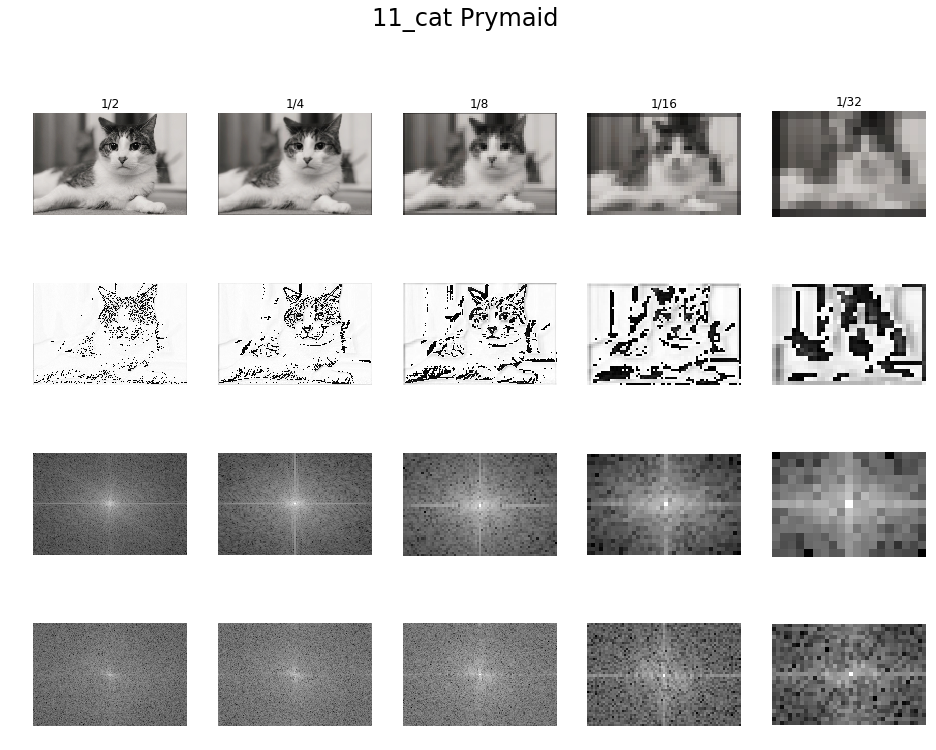

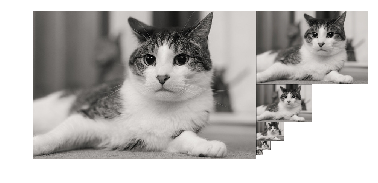

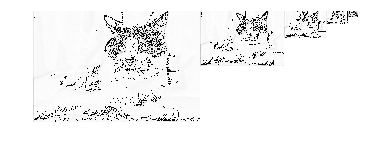

11_lion


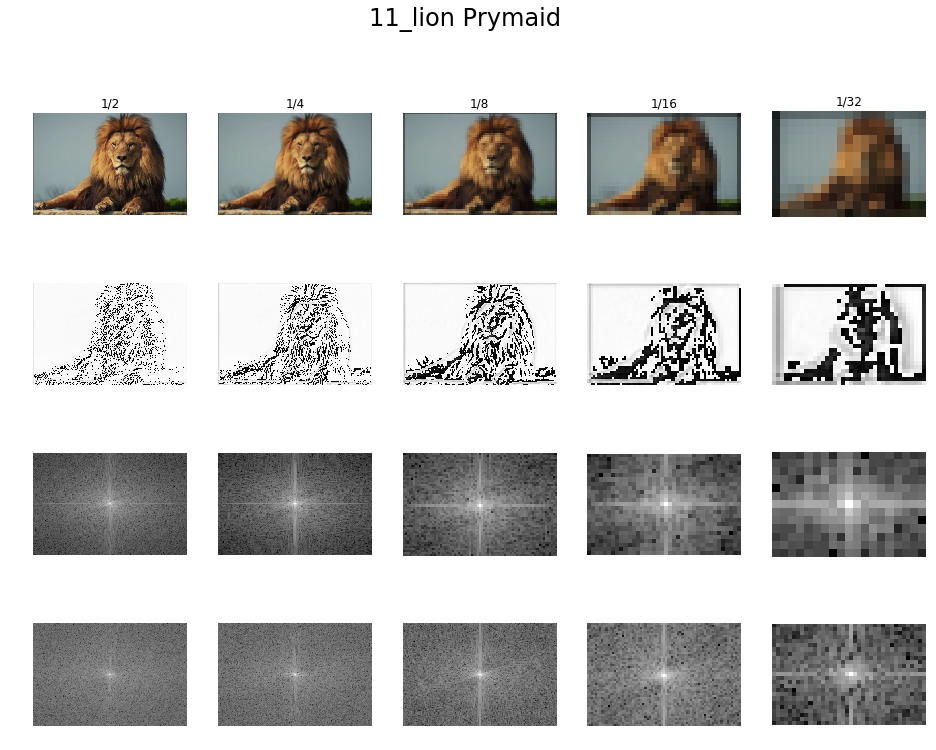

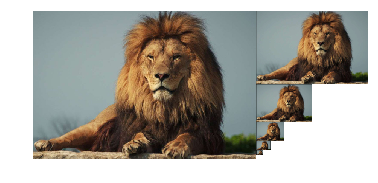

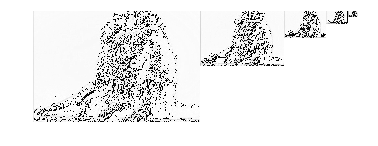

In [28]:
for i,im in enumerate(img):
    print(img_name[i])
    '''
    img_fft = 20*np.log(np.abs(fftshift(fft2(im))))
    plt.imshow(np.uint8(img_fft))
    plt.show()
    '''
    gau_res_img = np.ones((len(im),int(np.ceil(len(im[0])/2)),3),dtype=np.uint8)*255
    gau_res_y = 0
    lap_res_img = np.zeros((len(im),len(im[0])*2),dtype=np.uint8)
    lap_res_x = 0
    new_img = im.copy()
    
    fig = plt.figure(figsize=(16,12))
    
    for j in range(5):
        
        gaussian_filter = gauss2D_norm((len(new_img[0]),len(new_img[0])))
        
        # Downsample(Smooth(Gi))
        temp_img = conv2D(new_img,gaussian_filter)[::2,::2,:]
        plt.subplot(4,5,1+j)
        plt.axis('off')
        plt.title('1/{}'.format(2**(j+1)))
        plt.imshow(temp_img)
        gau_res_img[gau_res_y:gau_res_y+len(temp_img),:len(temp_img[0]),:] = temp_img
        gau_res_y+=len(temp_img)
        
        img_fft = np.log(np.abs(fftshift(fft2(cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)))))
        plt.subplot(4,5,11+j)
        plt.axis('off')
        plt.imshow(img_fft,cmap='gray')
        
        # Gi-Smooth(Upsample(Gi-1))
        new_img-=conv2D(temp_img.repeat(2, axis=0).repeat(2, axis=1).repeat(2, axis=2),gaussian_filter)[:len(new_img),:len(new_img[0]),:]
        plt.subplot(4,5,6+j)
        plt.axis('off')
        plt.imshow(new_img[:,:,0],cmap='gray_r')
        lap_res_img[:len(new_img),lap_res_x:lap_res_x+len(new_img[0])] = new_img[:,:,0]
        lap_res_x+=len(new_img[0])
        
        img_fft = np.log(np.abs(fftshift(fft2(cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)))))
        plt.subplot(4,5,16+j)
        plt.axis('off')
        plt.imshow(img_fft,cmap='gray')
        
        new_img = temp_img
        
    plt.suptitle('{} Prymaid'.format(img_name[i]),fontsize=24)
    plt.savefig('./prymaid/{}_prymaid'.format(img_name[i]))
    plt.show()
    gau_res_img = np.concatenate((im,gau_res_img),axis=1)
    plt.imshow(gau_res_img)
    plt.axis('off')
    plt.savefig('./prymaid/{}_gaussian_prymaid'.format(img_name[i]))
    plt.show()
    
    plt.imshow(lap_res_img,cmap='gray_r')
    plt.axis('off')
    plt.savefig('./prymaid/{}_laplacian_prymaid'.format(img_name[i]))
    plt.show()

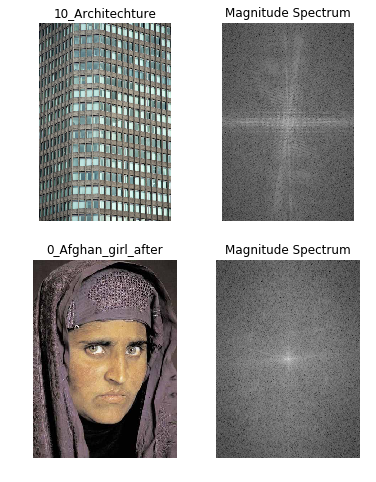

In [26]:
fig = plt.figure(figsize=(6,8))

img_fft = np.log(np.abs(fftshift(fft2(cv2.cvtColor(img[20], cv2.COLOR_BGR2GRAY)))))
plt.subplot(2,2,1)
plt.title(img_name[2])
plt.axis('off')
plt.imshow(img[20])
plt.subplot(2,2,2)
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.imshow(img_fft,cmap = 'gray')

img_fft = np.log(np.abs(fftshift(fft2(cv2.cvtColor(img[0], cv2.COLOR_BGR2GRAY)))))

plt.subplot(2,2,3)
plt.title(img_name[0])
plt.axis('off')
plt.imshow(img[0])

plt.subplot(2,2,4)
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.imshow(img_fft,cmap = 'gray')

plt.savefig('magnitude spectrum comparison')
plt.show()

In [ ]:
## Ground Truth
im_blur = img[0].copy()
for i in range(4):
    from scipy import ndimage
    im_blur = ndimage.gaussian_filter(im_blur, 1)
    im_blur = im_blur[::2,::2, :]
    plt.figure()
    plt.imshow(im_blur)
    plt.title('Blurred image')

    plt.show()

In [ ]:
out = img[0].copy()
for i in range(4):
    out = conv2D(out,h)
    out = np.uint8(out)[::2,::2,:]
    plt.imshow(out)
    plt.show()

In [ ]:
out2 = img[0].copy()
for i in range(4):
    out2 = out2[::2,::2,:]
    plt.imshow(out2)
    plt.show()

In [ ]:
fig = plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.title('Sub-Sampling')
plt.axis('off')
plt.imshow(out2)

plt.subplot(1,3,2)
plt.title('Scipy Gaussian Pre-filtering')
plt.axis('off')
plt.imshow(im_blur)

plt.subplot(1,3,3)
plt.title('Our Gaussian Pre-Filtering')
plt.axis('off')
plt.imshow(out)

fig.suptitle('Sub-sampling in 1/16 scale',fontsize=24)
fig.savefig('pre-filtering.png')
plt.show()